In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [6]:
df.loc[df['Type']==4]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [7]:
x=df.drop('Type',axis=1)
y=df['Type']

In [8]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,accuracy_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

Accuracy = 0.5514018691588785


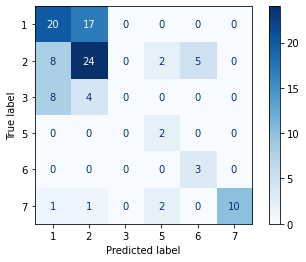

In [11]:
tree1 = DecisionTreeClassifier (criterion='entropy',max_depth=3, random_state=0)
tree1.fit(X_train , y_train) 
y_pred=tree1.predict(X_test)
print('Accuracy = {0}'.format(accuracy_score(y_pred,y_test)))
plot_confusion_matrix(tree1,X_test,y_test,cmap=plt.cm.Blues)


Accuracy = 0.6355140186915887


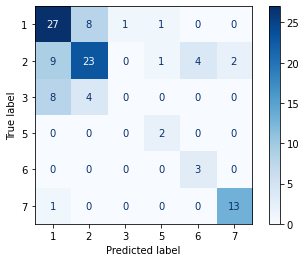

In [12]:
tree2 = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=0)
tree2.fit(X_train,y_train)
y_pred=tree2.predict(X_test)
print('Accuracy = {0}'.format(accuracy_score(y_pred,y_test)))
plot_confusion_matrix(tree2,X_test,y_test,cmap=plt.cm.Blues)

Accuracy = 0.6542056074766355


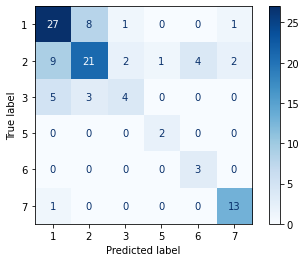

In [13]:
tree3 = DecisionTreeClassifier(criterion='gini',max_depth=12,random_state=0)
tree3.fit(X_train,y_train)
y_pred=tree3.predict(X_test)
print('Accuracy = {0}'.format(accuracy_score(y_pred,y_test)))
plot_confusion_matrix(tree3,X_test,y_test,cmap=plt.cm.Blues)

Accuracy = 0.6635514018691588


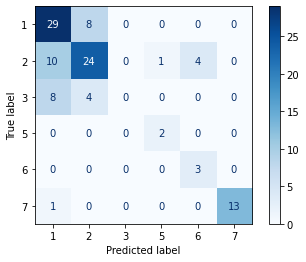

In [14]:
rtree1=RandomForestClassifier(n_estimators=300,random_state=1,criterion='entropy',max_depth=5)
rtree1.fit(X_train,y_train)
y_pred=rtree1.predict(X_test)
print('Accuracy = {0}'.format(accuracy_score(y_pred,y_test)))
plot_confusion_matrix(rtree1,X_test,y_test,cmap=plt.cm.Blues)

Accuracy = 0.6635514018691588


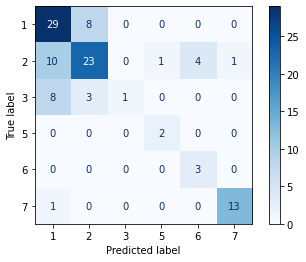

In [15]:
rtree2=RandomForestClassifier(n_estimators=3000,random_state=1,max_depth=9)
rtree2.fit(X_train,y_train)
y_pred=rtree2.predict(X_test)
print('Accuracy = {0}'.format(accuracy_score(y_pred,y_test)))
plot_confusion_matrix(rtree2,X_test,y_test,cmap=plt.cm.Blues)

Accuracy = 0.6542056074766355


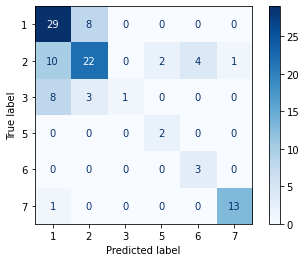

In [16]:
rtree3=RandomForestClassifier(n_estimators=456,random_state=1,max_depth=7)
rtree3.fit(X_train,y_train)
y_pred=rtree3.predict(X_test)
print('Accuracy = {0}'.format(accuracy_score(y_pred,y_test)))
plot_confusion_matrix(rtree3,X_test,y_test,cmap=plt.cm.Blues)